In [1]:
import pandas as pd

In [3]:
import numpy as np

In [6]:
task_data = pd.read_csv('Data/task_data.csv', error_bad_lines = False)

In [8]:
task_data

,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,sample0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,sample1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,sample2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,sample3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,sample4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969
...,...,...,...,...,...,...,...,...,...,...,...,...
395,sample395,-1.0,0.433150,0.816109,0.452945,0.065469,0.237093,0.719321,0.577969,0.085598,0.357115,0.070060
396,sample396,-1.0,0.339346,0.914610,0.097827,0.077522,0.484140,0.690568,0.420054,0.482845,0.395148,0.438641
397,sample397,-1.0,0.320118,0.444951,0.401896,0.970993,0.960264,0.138345,0.354927,0.230749,0.204612,0.558889
398,sample398,-1.0,0.059132,0.337426,0.772847,0.099038,0.966042,0.975086,0.532891,0.035839,0.258723,0.709958


In [9]:
task_data.isnull()

,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
task_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sample index  400 non-null    object 
 1   class_label   400 non-null    float64
 2   sensor0       400 non-null    float64
 3   sensor1       400 non-null    float64
 4   sensor2       400 non-null    float64
 5   sensor3       400 non-null    float64
 6   sensor4       400 non-null    float64
 7   sensor5       400 non-null    float64
 8   sensor6       400 non-null    float64
 9   sensor7       400 non-null    float64
 10  sensor8       400 non-null    float64
 11  sensor9       400 non-null    float64
dtypes: float64(11), object(1)
memory usage: 37.6+ KB


In [13]:
task_data.isna().sum()

sample index    0
class_label     0
sensor0         0
sensor1         0
sensor2         0
sensor3         0
sensor4         0
sensor5         0
sensor6         0
sensor7         0
sensor8         0
sensor9         0
dtype: int64

In [14]:
task_data.shape

(400, 12)

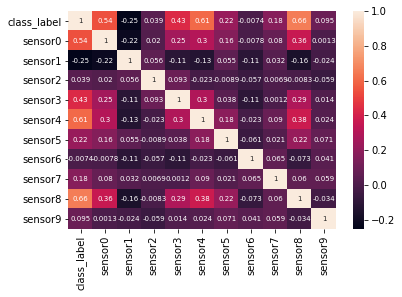

In [19]:
import seaborn as sns
corr = task_data.corr()
sns.heatmap(corr, annot=True, annot_kws={"size": 7})

In [21]:
#Separate your Features as X
X = task_data.loc[:, ['sensor0', 'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6',
                      'sensor7', 'sensor8', 'sensor9']]

#Separate your Label as y
y = task_data.loc[:, ['class_label']]

In [22]:
from sklearn.model_selection import train_test_split
# 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [24]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
obj_rand = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
obj_rand.fit(X_train, y_train.values.ravel())

y_pred = obj_rand.predict(X_test)

In [25]:
y_pred

array([ 1., -1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
       -1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1.,
       -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
        1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,
        1.,  1.])

In [30]:
#Check Accuracy
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9875


In [52]:
obj_rand.predict([[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]])
feature_names = ['sensor0', 'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6',
                      'sensor7', 'sensor8', 'sensor9']
feature_names

['sensor0',
 'sensor1',
 'sensor2',
 'sensor3',
 'sensor4',
 'sensor5',
 'sensor6',
 'sensor7',
 'sensor8',
 'sensor9']

In [59]:
importance = pd.Series(obj_rand.feature_importances_, index=feature_names).sort_values(ascending=False)
importance

sensor8    0.295711
sensor6    0.244617
sensor4    0.179192
sensor0    0.094824
sensor1    0.047073
sensor3    0.042111
sensor2    0.040314
sensor9    0.019969
sensor5    0.019593
sensor7    0.016597
dtype: float64

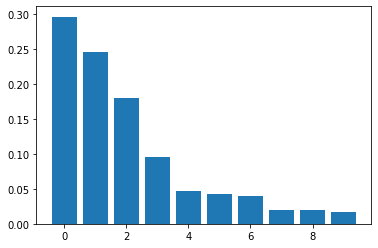

In [49]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

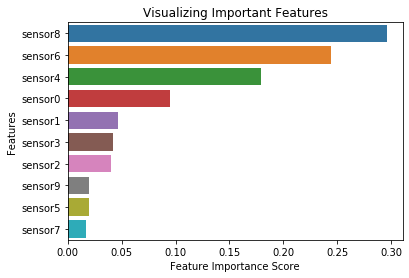

In [57]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x = importance, y = importance.index)
# Add labels to your graph
pyplot.xlabel('Feature Importance Score')
pyplot.ylabel('Features')
pyplot.title("Visualizing Important Features")
pyplot.show()